Dataset Loaded Successfully!
         player_name  goals  assists  passes  tackles  shots
0       Lionel Messi     25       18    2200       15    120
1  Cristiano Ronaldo     28       12    1500       10    140
2          Neymar Jr     20       15    1800       12    110
3      Kylian Mbappe     27       10    1700       14    130
4    Kevin De Bruyne     10       20    2500       18     90

Scaled Data:


,goals,assists,passes,tackles,shots
0,0.833333,0.894737,0.85,0.342105,0.793103
1,0.933333,0.578947,0.50,0.210526,0.931034
2,0.666667,0.736842,0.65,0.263158,0.724138
3,0.900000,0.473684,0.60,0.315789,0.862069
4,0.333333,1.000000,1.00,0.421053,0.586207



Performance Score Added:


,player_name,performance_score
0,Lionel Messi,466.25
1,Cristiano Ronaldo,326.90
2,Neymar Jr,382.55
3,Kylian Mbappe,365.70
4,Kevin De Bruyne,519.70



Predicted Ratings:


,player_name,predicted_rating
0,Lionel Messi,9.124751
1,Cristiano Ronaldo,5.500179
2,Neymar Jr,6.829006
3,Kylian Mbappe,6.377284
4,Kevin De Bruyne,10.000000
5,Virgil van Dijk,6.569271
6,Luka Modric,8.813827
7,Robert Lewandowski,3.501304
8,Sergio Ramos,1.776984
9,Manuel Neuer,0.000000



Player Categories:


,player_name,player_category
0,Lionel Messi,Average
1,Cristiano Ronaldo,Average
2,Neymar Jr,Average
3,Kylian Mbappe,Average
4,Kevin De Bruyne,Below Par
5,Virgil van Dijk,Star
6,Luka Modric,Below Par
7,Robert Lewandowski,Average
8,Sergio Ramos,Star
9,Manuel Neuer,Star


/tmp/ipython-input-1853962527.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='predicted_rating', y='player_name', data=top_players, palette="viridis")


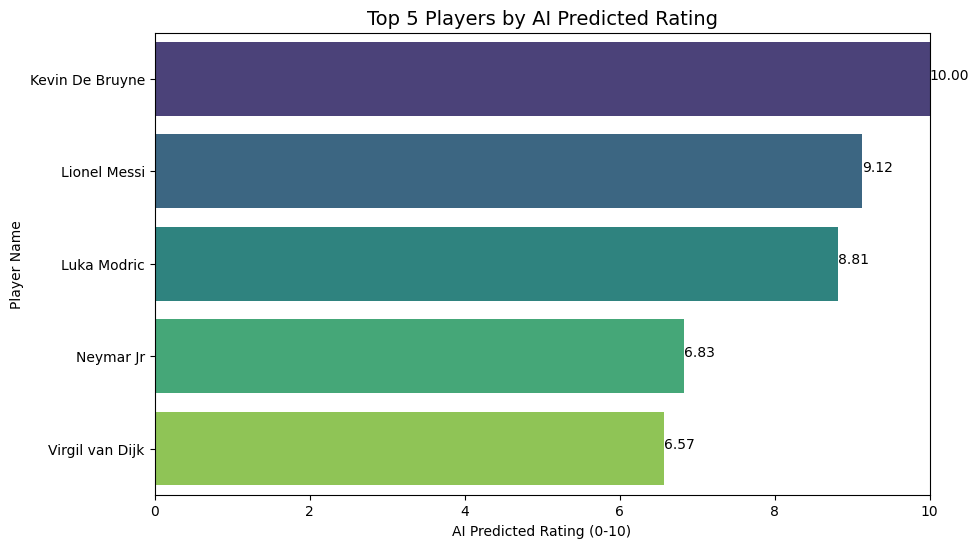

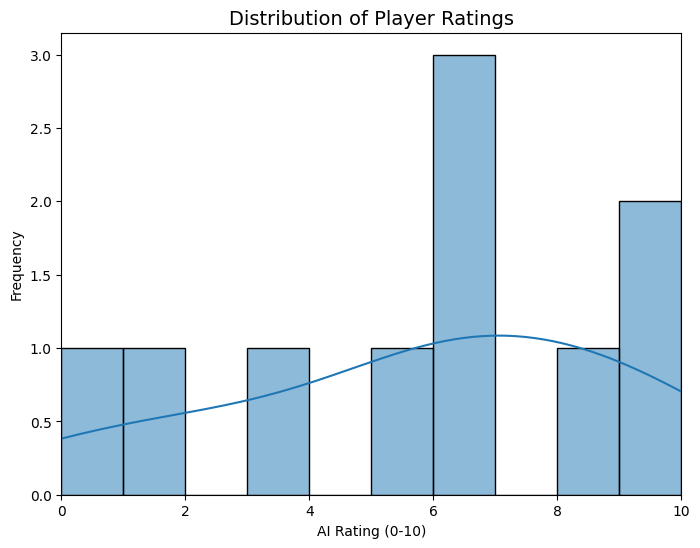

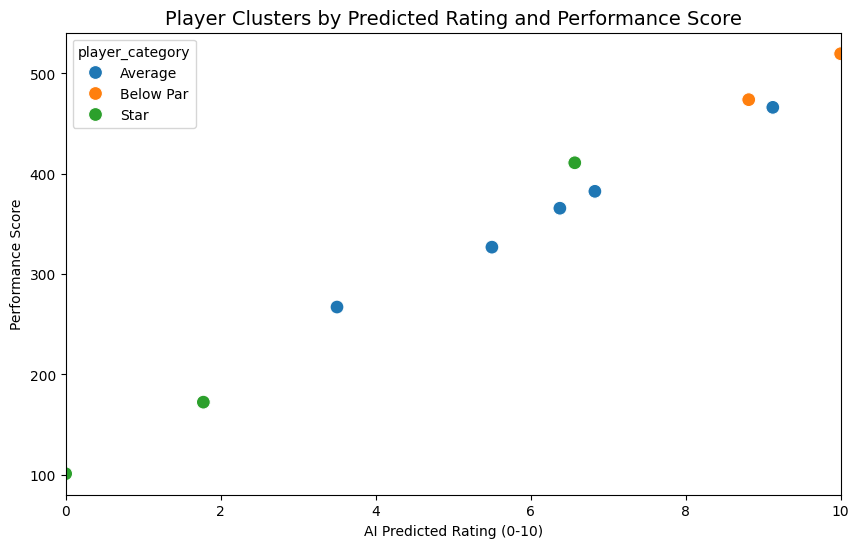


Final player ratings saved as 'player_ratings_output.csv'


In [13]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# ===============================
# 2. Load Dataset
# ===============================
try:
    data = pd.read_csv("sample_player_stats.csv")
    print("Dataset Loaded Successfully!")
    print(data.head())
except FileNotFoundError:
    print("Error: 'sample_player_stats.csv' not found. Please upload the file or create a dummy file.")
    # Create a dummy CSV file for testing
    data = {'player_name': ['Lionel Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'Kylian Mbappe', 'Kevin De Bruyne', 'Virgil van Dijk', 'Luka Modric', 'Robert Lewandowski', 'Sergio Ramos', 'Manuel Neuer'],
            'goals': [25, 28, 20, 27, 10, 5, 7, 30, 8, 0],
            'assists': [18, 12, 15, 10, 20, 2, 10, 8, 3, 1],
            'passes': [2200, 1500, 1800, 1700, 2500, 2000, 2300, 1200, 800, 500],
            'tackles': [15, 10, 12, 14, 18, 40, 22, 8, 35, 2],
            'shots': [120, 140, 110, 130, 90, 30, 60, 150, 40, 5]}
    data = pd.DataFrame(data)
    data.to_csv("sample_player_stats.csv", index=False)
    print("Dummy 'sample_player_stats.csv' created for demonstration.")
    print(data.head())


# ===============================
# 3. Data Preprocessing
# ===============================
# Handle missing values
data.fillna(0, inplace=True)

# Normalize stats for fairness
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['goals','assists','passes','tackles','shots']])
scaled_df = pd.DataFrame(scaled_features, columns=['goals','assists','passes','tackles','shots'])
print("\nScaled Data:")
display(scaled_df.head())

# Handle potential NaN or infinite values after scaling
scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_df.fillna(scaled_df.mean(), inplace=True)


# ===============================
# 4. Feature Engineering – Performance Score
# ===============================
data['performance_score'] = (
    0.3*data['goals'] +
    0.25*data['assists'] +
    0.2*data['passes'] +
    0.15*data['tackles'] +
    0.1*data['shots']
)
print("\nPerformance Score Added:")
display(data[['player_name','performance_score']].head())

# ===============================
# 5. Machine Learning Model – Predict Ratings
# ===============================
X = data[['goals','assists','passes','tackles','shots']]
y = data['performance_score']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

data['predicted_rating'] = model.predict(X)

# Normalize ratings (scale between 0–10)
data['predicted_rating'] = MinMaxScaler().fit_transform(data[['predicted_rating']])*10

print("\nPredicted Ratings:")
display(data[['player_name','predicted_rating']])

# ===============================
# 6. Clustering Players
# ===============================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init for KMeans
data['player_category'] = kmeans.fit_predict(scaled_df[['goals','assists','passes','tackles','shots']]) # Use scaled features for clustering

# Map numerical labels to categories
category_map = {0: "Average", 1: "Star", 2: "Below Par"}
data['player_category'] = data['player_category'].map(category_map)


print("\nPlayer Categories:")
display(data[['player_name','player_category']])

# ===============================
# 7. Visualization
# ===============================
# Top 5 players by AI rating
top_players = data.sort_values('predicted_rating', ascending=False).head(5)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='predicted_rating', y='player_name', data=top_players, palette="viridis")
plt.title("Top 5 Players by AI Predicted Rating", fontsize=14)
plt.xlabel("AI Predicted Rating (0-10)")
plt.ylabel("Player Name")
plt.xlim(0, 10) # Set x-axis limit to 0-10
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height()/2, '{:,.2f}'.format(width), ha="left")

plt.show()

# Distribution of Player Ratings
plt.figure(figsize=(8,6))
sns.histplot(data['predicted_rating'], bins=10, kde=True) # Increased bins for better distribution
plt.title("Distribution of Player Ratings", fontsize=14)
plt.xlabel("AI Rating (0-10)")
plt.ylabel("Frequency")
plt.xlim(0, 10) # Set x-axis limit to 0-10
plt.show()


# ===============================
# 8. Export Final Results
# ===============================
data.to_csv("player_ratings_output.csv", index=False)
print("\nFinal player ratings saved as 'player_ratings_output.csv'")